In [1]:
import matplotlib.pyplot as plt
import math
import matplotlib.cm
import numpy as np

## Изначальные данные

In [2]:
f1 = open('data.txt', 'r')

m = []

for i in range(7):
    m.append(float(f1.readline()))
m.append(int(f1.readline()))
m.append(int(f1.readline()))
m.append(int(f1.readline()))

In [3]:
a = m[0]
b1 = m[1]
b2 = m[2]
c = m[3]

hx = m[4]
hy = m[5]
tau = m[6]

nx = m[7]
ny = m[8]
k = m[9]

x = []
for i in range(nx):
    x.append(hx * i)

y = [] 
for i in range(ny):
    y.append(hy * i)
    
t = [] 
for i in range(k):
    t.append(tau * i)

x = np.array(x)
y = np.array(y)
t = np.array(t)

yy, xx = np.meshgrid(y, x)

## Функции отрисовки

In [4]:
def plt_res(xx, yy, t, z, resz, step):
    fig, ax = plt.subplots(3, 2, figsize = (20, 20), subplot_kw = {"projection": "3d"})

    ax[0][0].set_title("t = " + str(t[step]) + "\n" + "analitical")
    ax[0][0].view_init(50, 180)
    ax[0][0].set_zlim(-1, 1)
    ax[0][0].set(xlabel='x', ylabel='y')
    surf = ax[0][0].plot_surface(xx, yy, z[1],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    ax[0][1].set_title("t = " + str(t[step]) + "\n" + "numerical")
    ax[0][1].view_init(50, 180)
    ax[0][1].set_zlim(-1, 1)
    ax[0][1].set(xlabel='x', ylabel='y')
    surf = ax[0][1].plot_surface(xx, yy, resz[0],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)


    ax[1][0].set_title("t = " + str(t[step * 2]) + "\n" + "analitical")
    ax[1][0].view_init(50, 180)
    ax[1][0].set_zlim(-1, 1)
    surf = ax[1][0].plot_surface(xx, yy, z[2],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    ax[1][1].set_title("t = " + str(t[step * 2]) + "\n" + "numerical")
    ax[1][1].view_init(50, 180)
    ax[1][1].set_zlim(-1, 1)
    surf = ax[1][1].plot_surface(xx, yy, resz[1],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)


    ax[2][0].set_title("t = " + str(t[step * 3]) + "\n" + "analitical")
    ax[2][0].view_init(50, 180)
    ax[2][0].set_zlim(-1, 1)
    surf = ax[2][0].plot_surface(xx, yy, z[3],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    ax[2][1].set_title("t = " + str(t[step * 3]) + "\n" + "numerical")
    ax[2][1].view_init(50, 180)
    ax[2][1].set_zlim(-1, 1)
    surf = ax[2][1].plot_surface(xx, yy, resz[2],
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)


    plt.show()

In [5]:
def plt_error(xx, yy, t, z, resz, step):
    fig, ax = plt.subplots(3, 1, figsize = (20, 20), subplot_kw = {"projection": "3d"})

    ax[0].set_title("t = " + str(t[step]))
    ax[0].view_init(30, 0)
    ax[0].set(xlabel='x', ylabel='y')
    surf = ax[0].plot_surface(xx, yy, np.abs(z[1] - resz[0]),
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    ax[1].set_title("t = " + str(t[step * 2]))
    ax[1].view_init(30, 0)
    ax[1].set(xlabel='x', ylabel='y')
    surf = ax[1].plot_surface(xx, yy, np.abs(z[2] - resz[1]),
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    ax[2].set_title("t = " + str(t[step * 3]))
    ax[2].view_init(30, 0)
    ax[2].set(xlabel='x', ylabel='y')
    surf = ax[2].plot_surface(xx, yy, np.abs(z[3] - resz[2]),
                             edgecolors = ["black"], linewidth = 1,
                             cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)



In [6]:
def plt_error_t(xx, yy, t, u):
    error_t = []

    for i in range(len(t)):
        zz = fun(xx, yy, t[i])
        zz = np.array(zz)
        error_t.append(np.abs(zz - np.array(u[:, :, i])).max(axis = (0,1)))


    figure = plt.figure(figsize = (20, 10))
    plt.plot(t, error_t)
    plt.show()

## Аналитическое решение

In [7]:
def fun(x, y, t):
    return x * y * np.cos(t)

In [8]:
step = len(t) // 3 - 1

In [9]:
z = []
z.append(fun(xx, yy, 0))
z.append(fun(xx, yy, t[step]))
z.append(fun(xx, yy, t[step * 2]))
z.append(fun(xx, yy, t[step * 3]))

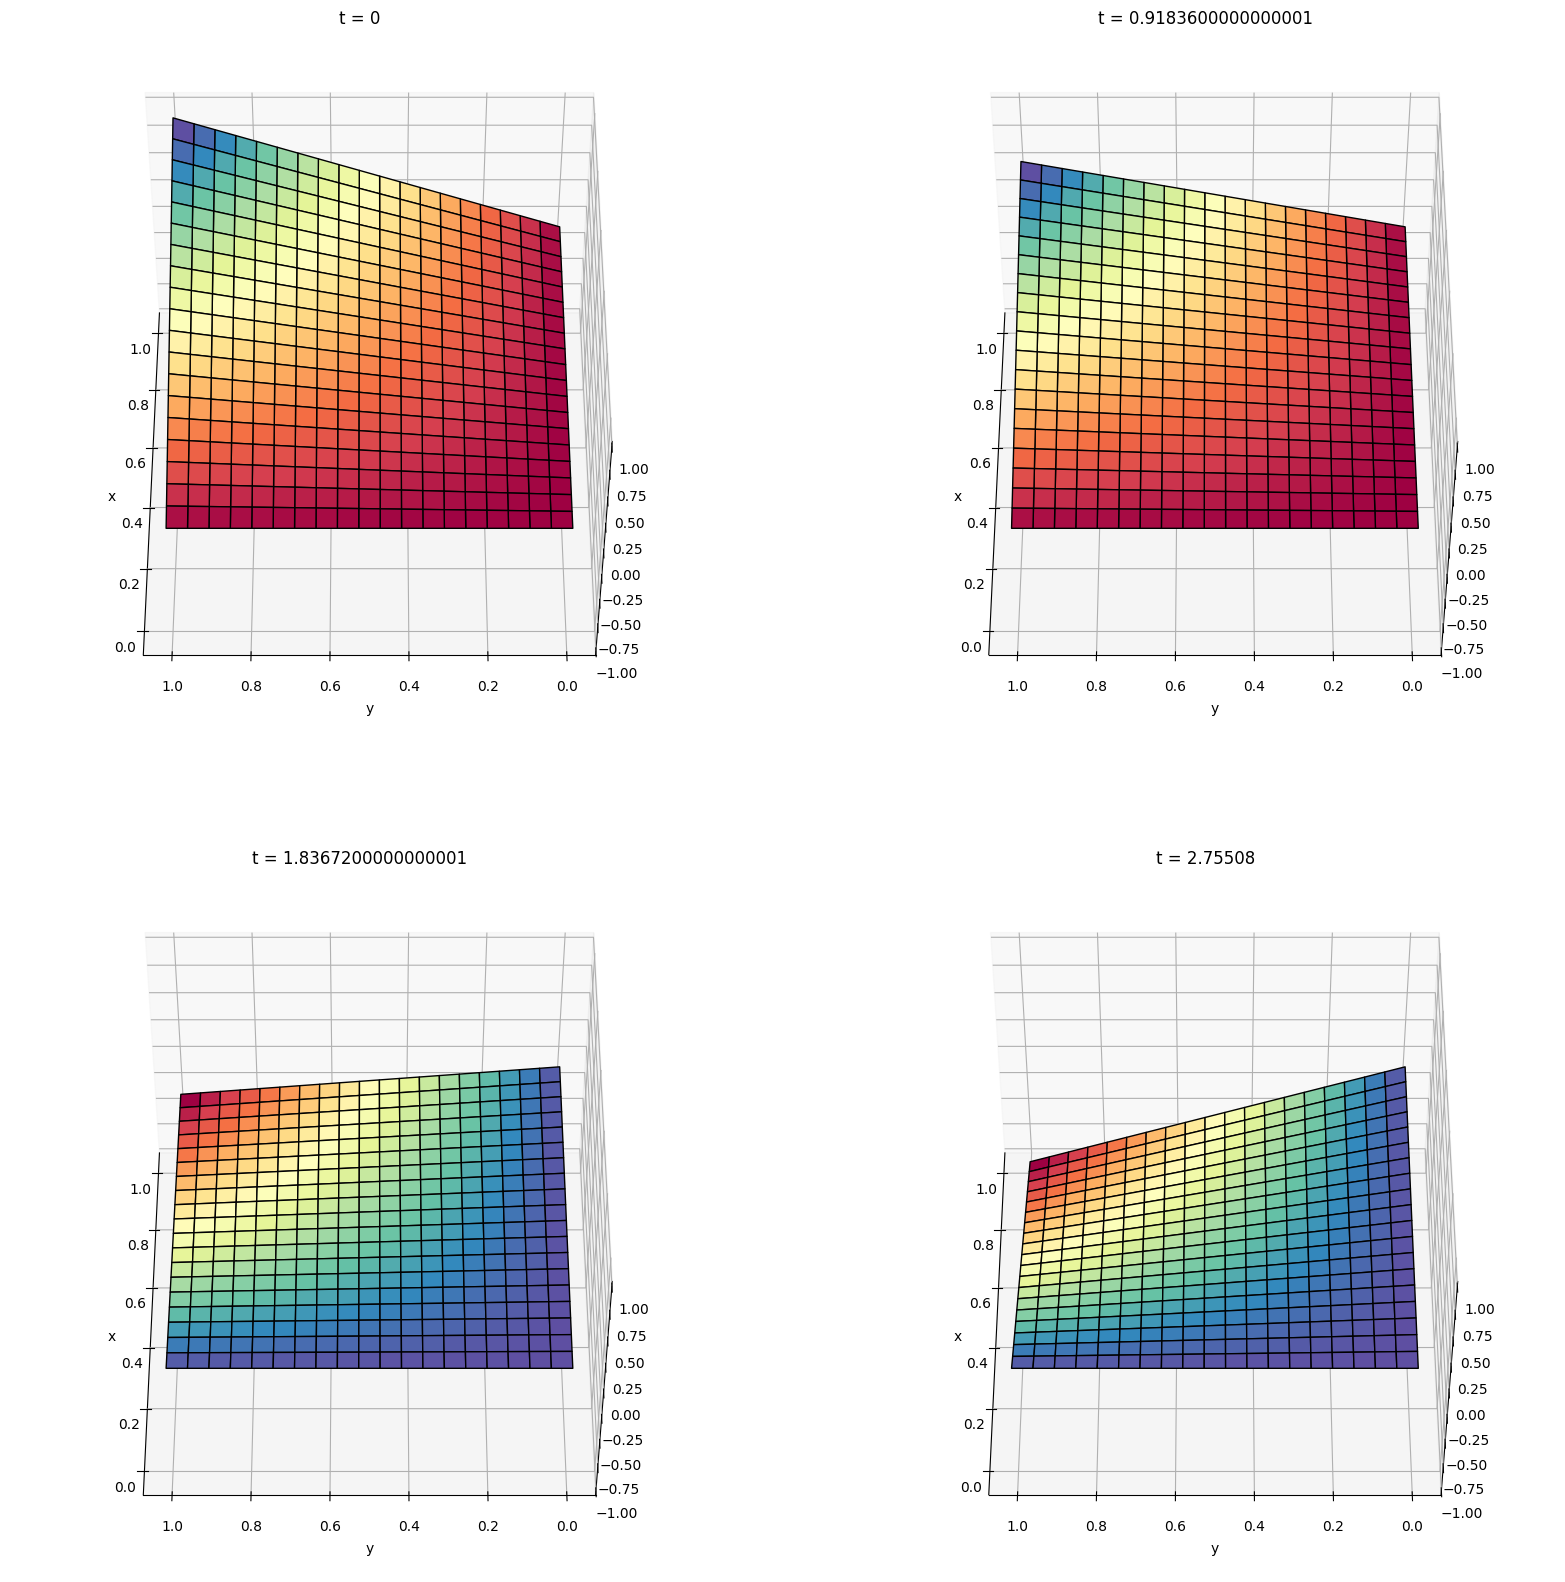

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20), subplot_kw = {"projection": "3d"})

ax[0][0].set_title("t = " + str(0))
ax[0][0].view_init(50, 180)
ax[0][0].set_zlim(-1, 1)
ax[0][0].set(xlabel='x', ylabel='y')
surf = ax[0][0].plot_surface(xx, yy, z[0],
                         edgecolors = ["black"], linewidth = 1,
                         cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

                   
ax[0][1].set_title("t = " + str(t[step]))                  
ax[0][1].view_init(50, 180)
ax[0][1].set_zlim(-1, 1)
ax[0][1].set(xlabel='x', ylabel='y')
surf = ax[0][1].plot_surface(xx, yy, z[1],
                         edgecolors = ["black"], linewidth = 1,
                         cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

                   
ax[1][0].set_title("t = " + str(t[step * 2])) 
ax[1][0].view_init(50, 180)
ax[1][0].set_zlim(-1, 1)
ax[1][0].set(xlabel='x', ylabel='y')
surf = ax[1][0].plot_surface(xx, yy, z[2],
                         edgecolors = ["black"], linewidth = 1,
                         cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

ax[1][1].set_title("t = " + str(t[step * 3]))                    
ax[1][1].view_init(50, 180)
ax[1][1].set_zlim(-1, 1)
ax[1][1].set(xlabel='x', ylabel='y')
surf = ax[1][1].plot_surface(xx, yy, z[3],
                         edgecolors = ["black"], linewidth = 1,
                         cmap = matplotlib.cm.Spectral, shade = True, antialiased = True)

    
plt.show()

## Метод переменных направлений

In [11]:
u = []

u = (f1.readline()).split()

u = np.array(u, dtype = np.float32)
u = u.reshape(nx, ny, k)

In [12]:
resz = []

resz.append([])
for i in range(nx):
    resz[0].append([])
    for j in range(ny):
        resz[0][i].append(u[i][j][step])
    
resz.append([])
for i in range(nx):
    resz[1].append([])
    for j in range(ny):
        resz[1][i].append(u[i][j][step * 2])
        
        
resz.append([])
for i in range(nx):
    resz[2].append([])
    for j in range(ny):
        resz[2][i].append(u[i][j][step * 3])
        
resz = np.array(resz)

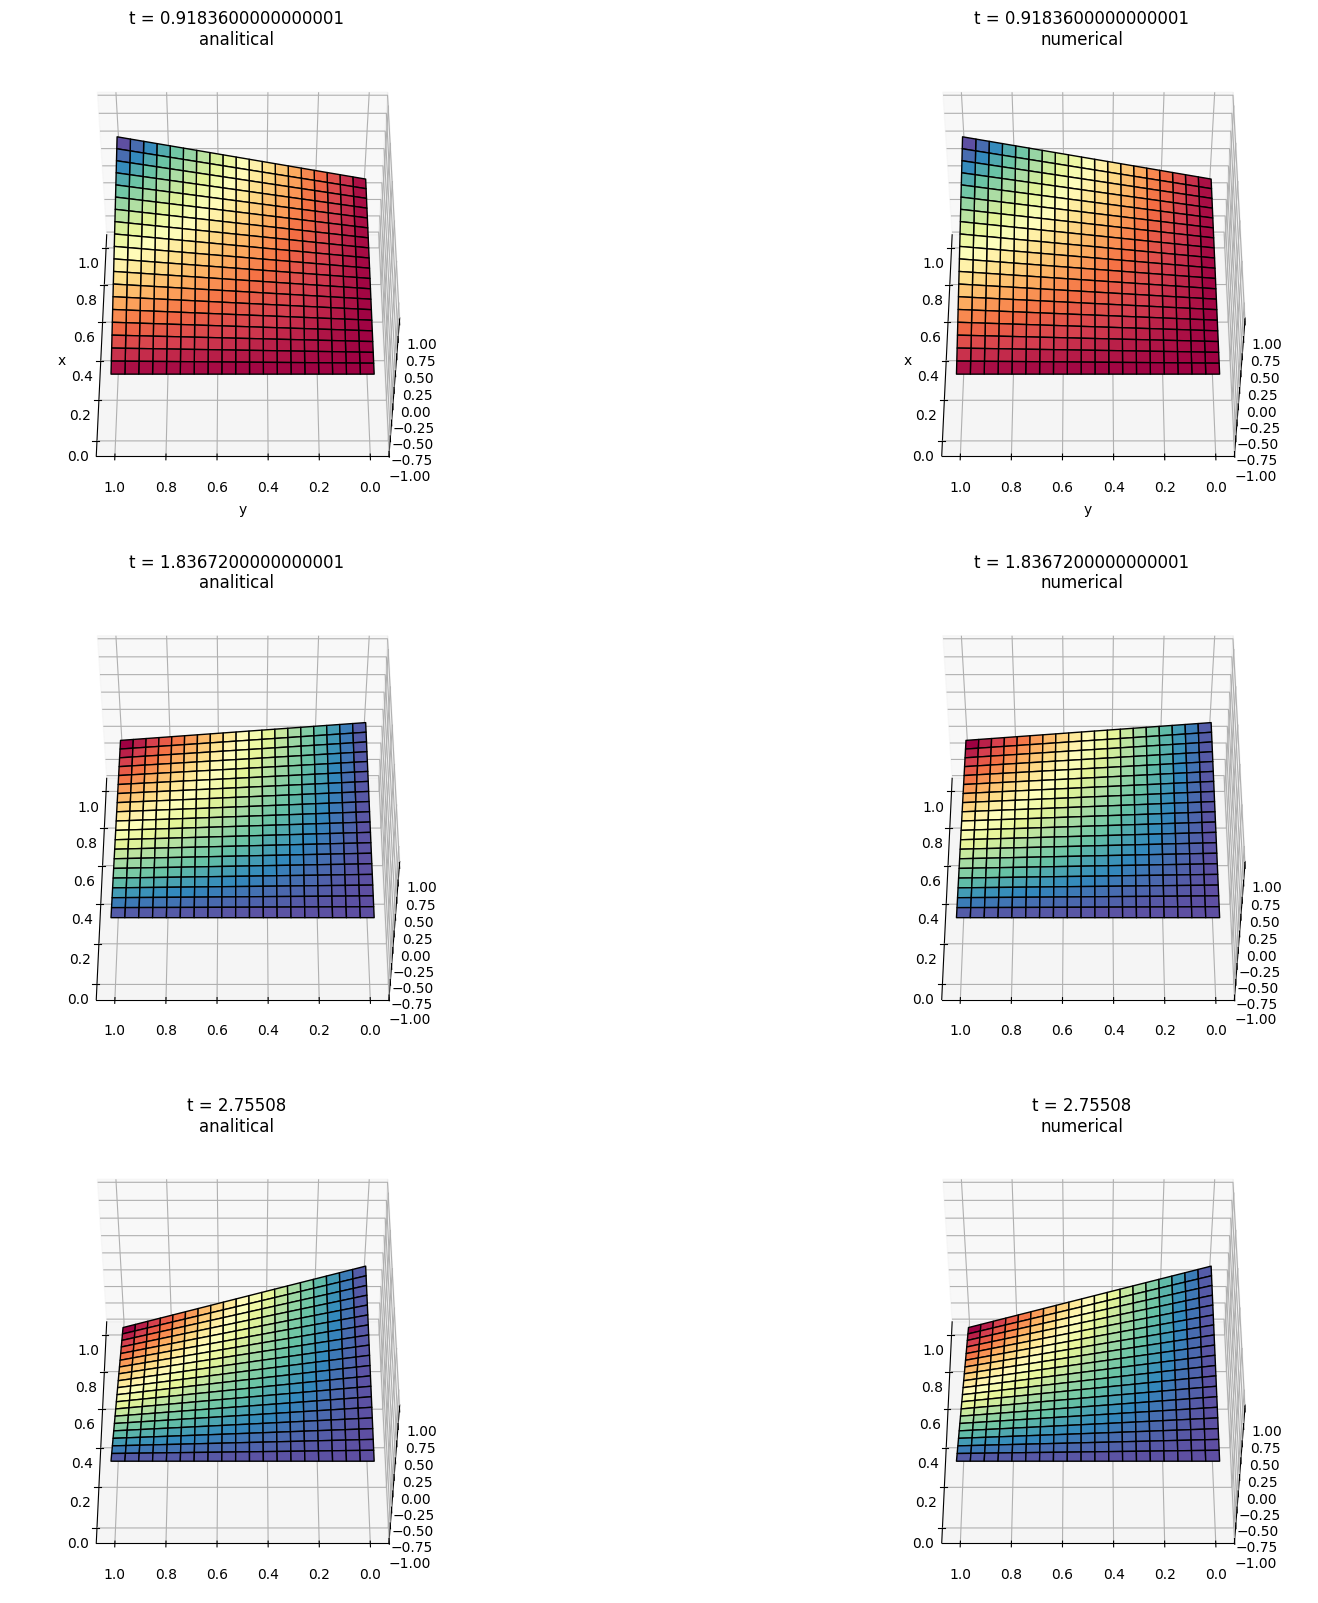

In [13]:
plt_res(xx, yy, t, z, resz, step)

## Погрешность

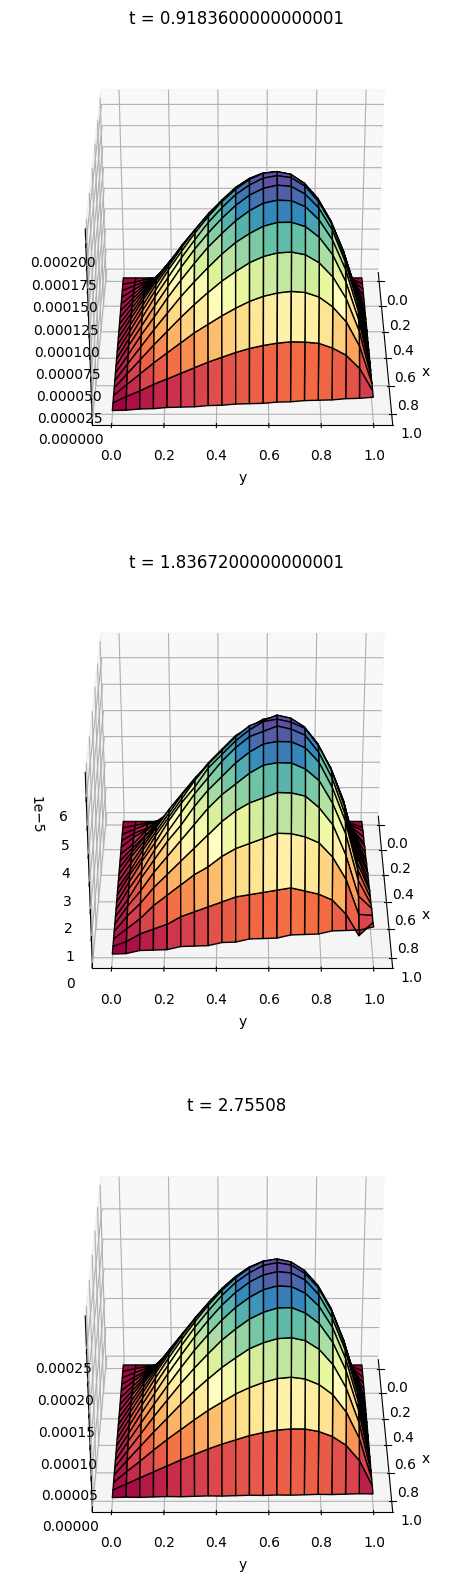

In [14]:
plt_error(xx, yy, t, z, resz, step)

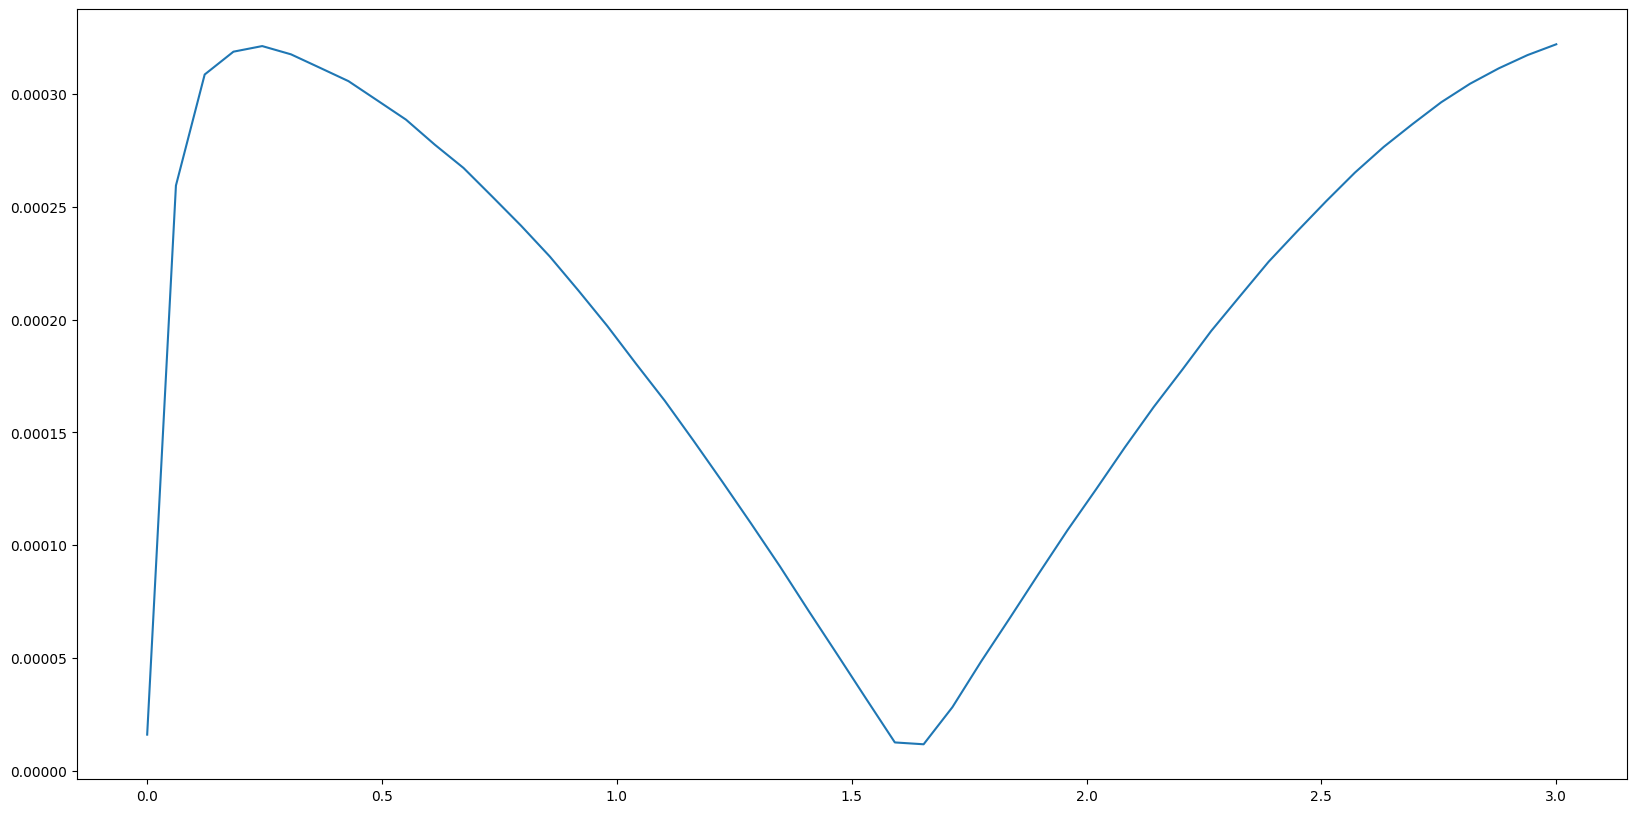

In [15]:
plt_error_t(xx, yy, t, u)

# Метод дробных шагов

In [16]:
u = []

u = (f1.readline()).split()

u = np.array(u, dtype = np.float32)
u = u.reshape(nx, ny, k)

In [17]:
resz = []

resz.append([])
for i in range(nx):
    resz[0].append([])
    for j in range(ny):
        resz[0][i].append(u[i][j][step])
    
resz.append([])
for i in range(nx):
    resz[1].append([])
    for j in range(ny):
        resz[1][i].append(u[i][j][step * 2])
        
        
resz.append([])
for i in range(nx):
    resz[2].append([])
    for j in range(ny):
        resz[2][i].append(u[i][j][step * 3])
        
resz = np.array(resz)

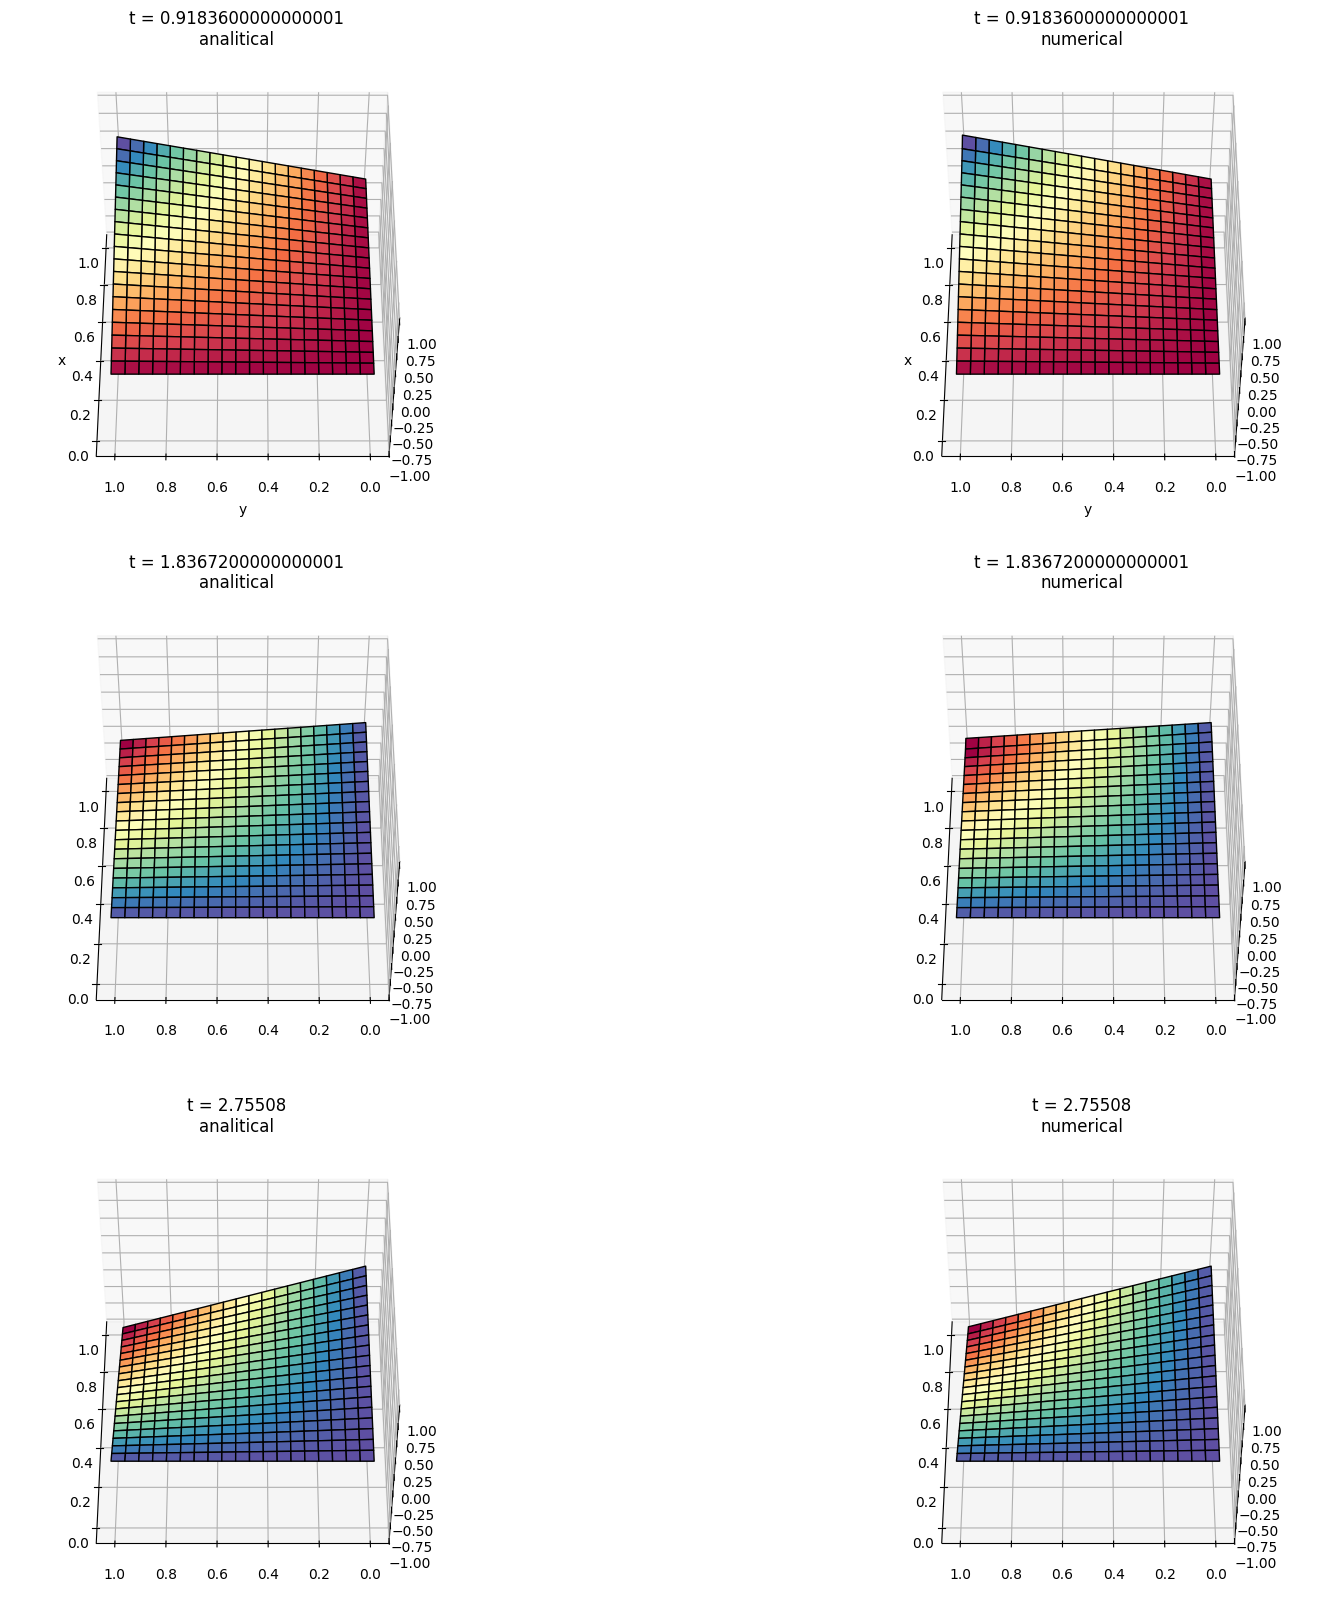

In [18]:
plt_res(xx, yy, t, z, resz, step)

# Погрешность

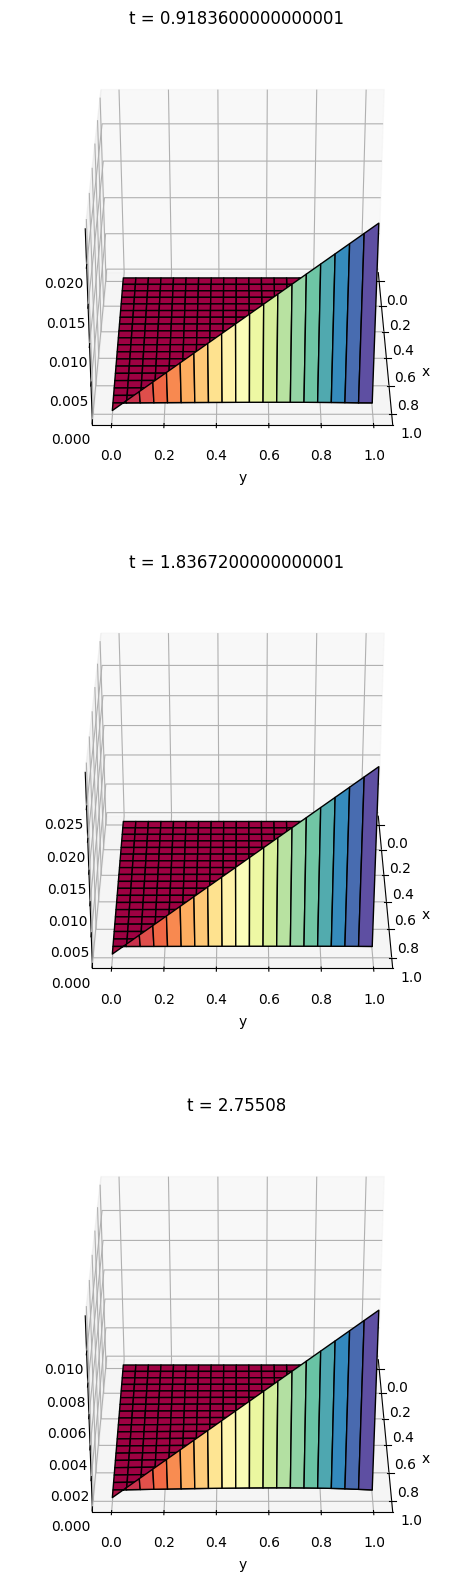

In [19]:
plt_error(xx, yy, t, z, resz, step)

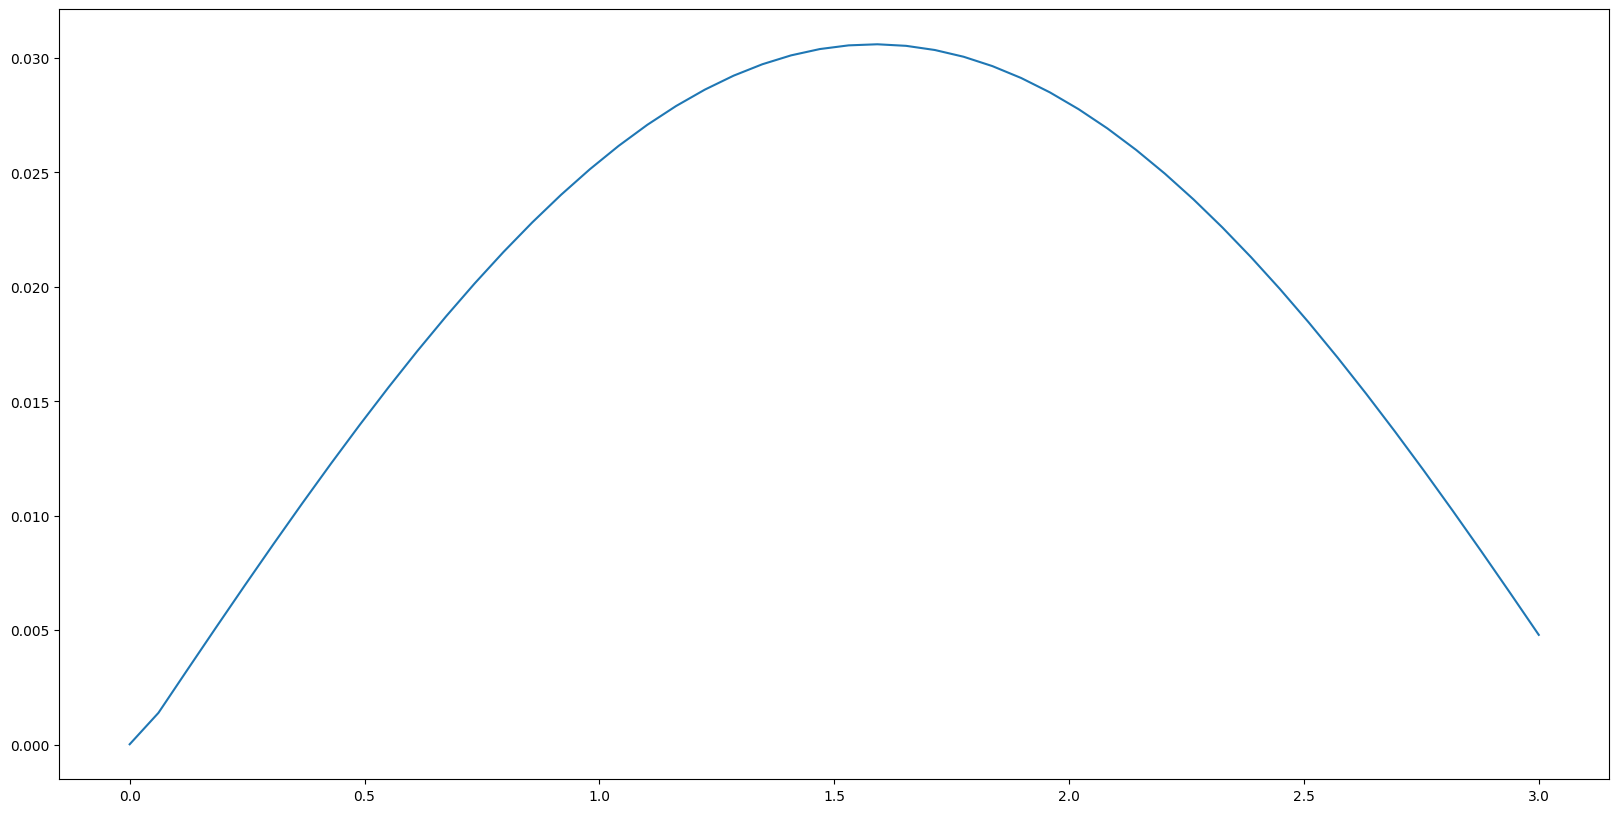

In [20]:
plt_error_t(xx, yy, t, u)

In [21]:
f1.close()